<a href="https://colab.research.google.com/github/wangjb/radar_data_processing/blob/master/CWB_opendata_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radar CREF data

In [ ]:
import urllib
# query string to CWB open data service

url='https://opendata.cwb.gov.tw/'
#sub_path='api/v1/rest/datastore/'
sub_path='fileapi/v1/opendataapi/'

# radar CREF data
#datacode=C-B0074-001
datacode='O-A0059-001'
auth='CWB-31ADCF8F-BA9A-4418-A7C0-9D3C0761F8F6'
datalimit=''
dataoffset=''
dataformat='JSON'
stationID=''
datastatus=''

# create query string
url_path=url+sub_path+datacode
query_fields=['Authorization','limit','offset','format','stationID','status']
query_data=(auth,datalimit,dataoffset,dataformat,stationID,datastatus)
query_string=dict(zip(query_fields,query_data))
#url_path+='?'+urllib.parse.urlencode(query_string)
print(url_path)

https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/O-A0059-001


In [ ]:
import requests
r = requests.get(url_path,params=query_string,stream=True)
jsondata = r.json()

In [ ]:
jsondata['cwbopendata']['dataset']['datasetInfo']

{'datasetDescription': '雷達合成回波',
 'parameterSet': {'parameter': [{'parameterName': '左下角',
    'parameterValue': '115.0,18.0'},
   {'parameterName': '解析度', 'parameterValue': '0.0125'},
   {'parameterName': '時間', 'parameterValue': '2020-07-31T10:00:00+08:00'},
   {'parameterName': '維度(nx*ny)', 'parameterValue': '921*881'},
   {'parameterName': '單位', 'parameterValue': 'dBZ'}]}}

In [ ]:
import ast
import numpy as np
data = np.asarray(ast.literal_eval(jsondata['cwbopendata']['dataset']['contents']['content']))
data = data.reshape((881,921))

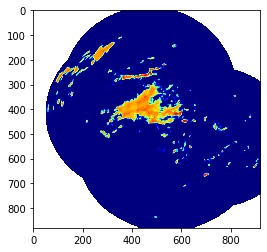

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

mask_id = np.where(data==-999.0)
data[mask_id] = np.nan
ma = np.ma.array(data,mask=np.isnan(data))
plt.imshow(ma,cmap='jet')

In [ ]:
pip install --user git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-px5r5uyi
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-px5r5uyi
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
